In [ ]:
# Invoice Text Extraction with Google Sheets Integration

In [ ]:
!apt-get install -y tesseract-ocr poppler-utils -q
!pip install pytesseract -q
!pip install gspread -q
!pip install oauth2client -q
!pip install pillow -q
!pip install pdf2image -q
!pip install pytesseract -q
!pip install matplotlib -q

Reading package lists...
Building dependency tree...
Reading state information...
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  poppler-utils tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 4 newly installed, 0 to remove and 49 not upgraded.
Need to get 5,002 kB of archives.
After this operation, 16.3 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 poppler-utils amd64 22.02.0-2ubuntu0.6 [186 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:4 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Fetched 5,002 kB in 1s (3,669 kB/s)
Selecting previously unselected package poppler-utils.
(Rea

In [ ]:
# Import Libraries
import gspread
from oauth2client.service_account import ServiceAccountCredentials
from pdf2image import convert_from_path
from PIL import Image
import pytesseract
import os
import matplotlib.pyplot as plt

In [ ]:
# Function to Connect to Google Sheets
def connect_to_google_sheet(sheet_name):
    # Scope of the API
    scope = ["https://spreadsheets.google.com/feeds", "https://www.googleapis.com/auth/drive"]

    # Authenticate using the credentials JSON file
    credentials = ServiceAccountCredentials.from_json_keyfile_name(
        "/content/drive/MyDrive/Colab Notebooks/task1.json", scope
    )
    client = gspread.authorize(credentials)

    # Open the Google Sheet
    sheet = client.open(sheet_name).sheet1
    return sheet


In [ ]:
# Display Image on Console
def display_image(image):
    plt.figure(figsize=(8, 10))
    plt.imshow(image, cmap='gray')
    plt.axis('off')
    plt.show()

In [ ]:
# Function to Check File Type
def get_file_type(file_path):
    file_extension = os.path.splitext(file_path)[1].lower()  # Get the file extension
    if file_extension in ['.jpg', '.jpeg', '.png']:
        return 'image'
    elif file_extension == '.pdf':
        return 'pdf'
    else:
        raise ValueError("Unsupported file type. Please provide an image or PDF.")

In [ ]:
# Function to Convert PDF to Images
def convert_pdf_to_images(pdf_path):
    images = convert_from_path(pdf_path, dpi=300, grayscale=True,)
    return images

In [ ]:
# Function to Extract Text with Tesseract
def extract_text_from_images(images):
    all_text = []
    for image in images:
        config = '--oem 3 --psm 6'  # Adjust configuration for better OCR results
        text = pytesseract.image_to_string(image, config=config)
        all_text.append(text)
    return "\n".join(all_text)  # Combine all pages' text

In [ ]:
# Write Text to Google Sheets
def write_text_to_sheet(sheet, text):

    lines = text.splitlines()  # Split the text into lines

    data = [line.split() for line in lines]  # Split each line into words for separate columns

    # Clear the sheet first
    sheet.clear()

    # Update the sheet using batch_update
    sheet.batch_update([{'range': 'A1', 'values': data}])


In [ ]:
# Function to Process File
def process_file(file_path, sheet_name):
    try:
        # Connect to Google Sheet
        sheet = connect_to_google_sheet(sheet_name)

        # Check if the file is a PDF or Image
        file_type = get_file_type(file_path)

        if file_type == 'image':
            image = Image.open(file_path)
            display_image(image)
            text = extract_text_from_images(image)
        elif file_type == 'pdf':
            # Convert PDF to Images
            pages = convert_pdf_to_images(file_path)
            for i, page in enumerate(pages):
                print(f"Displaying image from page {i+1}")
                display_image(page)
            text = extract_text_from_images(pages)

        # Write the extracted text to Google Sheets
        write_text_to_sheet(sheet, text)

        print("Text extracted and saved to Google Sheet successfully!")
    except Exception as e:
        print(f"Error: {e}")


Displaying image from page 1


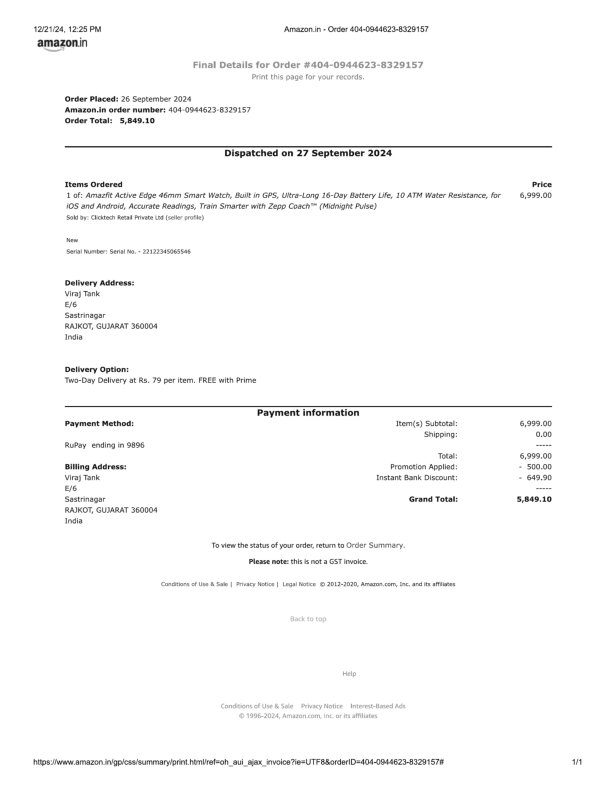

Text extracted and saved to Google Sheet successfully!


In [ ]:
# Call the Function
file_path = '/content/drive/MyDrive/Task3/invoices/printable_invoice.pdf'
sheet_name = 'Task7'
process_file(file_path, sheet_name)